In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [42]:
def get_pandas_df(filename):
    crossing = np.loadtxt('acc_v201803br.txt')
    print(crossing.shape)
    new_waves = pd.read_csv(filename, parse_dates=[5])
    print(len(new_waves.lons))
    new_waves.set_index('time', inplace=True)
    new_waves.drop(['Unnamed: 0'], axis=1, inplace=True)
    new_waves['crossing'] = pd.Series(crossing, index=new_waves.index)
    return new_waves


In [43]:
#new_waves = get_pandas_df('pandasmodel_new_waves.txt')
v201803_br = get_pandas_df('pandasmodel_v201803br.txt')
#v201803 = get_pandas_df('pandasmodel_v201803.txt')

(72904,)
72904


In [34]:
new_waves

,crossing,ferry,lats,lons,model
time,,,,,
2017-03-07 00:31:00,0.0,28.344260,49.177333,-123.648961,25.385050
2017-03-07 00:32:00,0.0,28.350301,49.179833,-123.656239,25.297093
2017-03-07 00:33:00,0.0,28.192531,49.182333,-123.663294,25.240703
2017-03-07 00:34:00,0.0,27.791114,49.184750,-123.670350,25.169818
2017-03-07 00:35:00,0.0,27.419489,49.187250,-123.677433,25.117185
2017-03-07 00:36:00,0.0,27.324686,49.189667,-123.684433,25.251175
2017-03-07 00:37:00,0.0,27.321675,49.192083,-123.691433,25.292077
2017-03-07 00:38:00,0.0,27.295883,49.194556,-123.698489,25.229865
2017-03-07 00:39:00,0.0,27.324413,49.196806,-123.705739,25.306288


In [44]:
def extract_mean_cross(new_waves):

    new_waves_mar = new_waves[new_waves.index.month == 3]
    new_waves_mar = new_waves_mar[new_waves_mar.crossing > 0]
    new_waves_apr = new_waves[new_waves.index.month == 4]
    new_waves_apr = new_waves_apr[new_waves_apr.crossing > 0]
    new_waves_may = new_waves[new_waves.index.month == 5]
    new_waves_may = new_waves_may[new_waves_may.crossing > 0] 
    
    cross_mar = new_waves_mar.groupby(pd.cut(new_waves_mar.lons, 30)).mean()
    cross_apr = new_waves_apr.groupby(pd.cut(new_waves_apr.lons, 30)).mean()
    cross_may = new_waves_may.groupby(pd.cut(new_waves_may.lons, 30)).mean()
    return cross_mar, cross_apr, cross_may

In [45]:
#new_waves_mar, new_waves_apr, new_waves_may = extract_mean_cross(new_waves)
v201803_br_mar, v201803_br_apr, v201803_br_may = extract_mean_cross(v201803_br)
#v201803_mar, v201803_apr, v201803_may = extract_mean_cross(v201803)

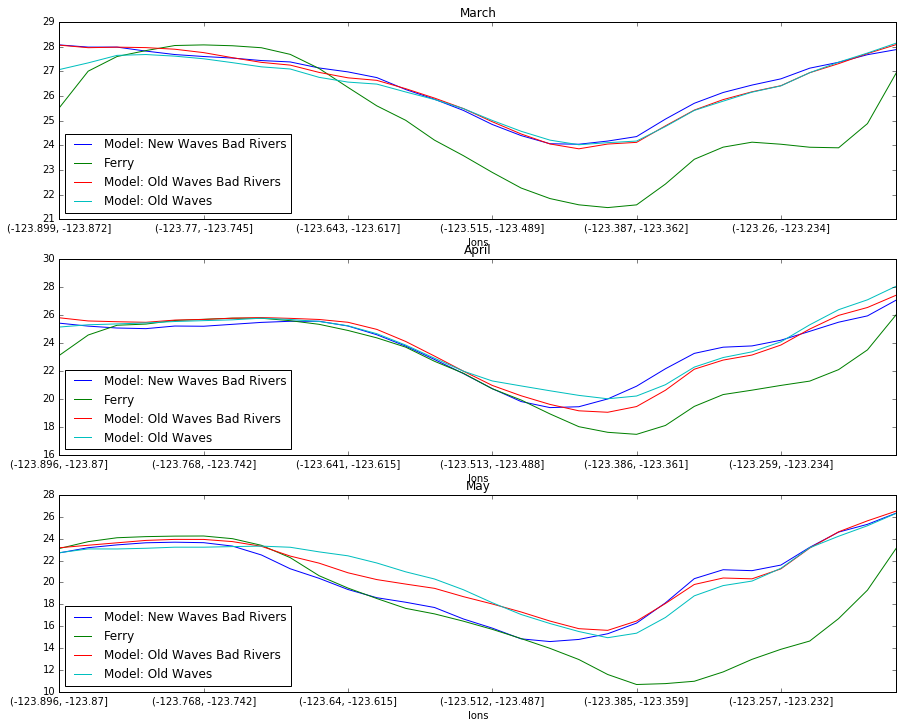

In [49]:
fig, axs = plt.subplots(3, 1, figsize=(15,12))

new_waves_mar.model.plot(ax=axs[0], label='Model: New Waves Bad Rivers')
v201803_br_mar.ferry.plot(ax=axs[0], label='Ferry')
v201803_br_mar.model.plot(ax=axs[0], label='Model: Old Waves Bad Rivers')
v201803_mar.model.plot(ax=axs[0], label='Model: Old Waves')
axs[0].legend(loc='lower left')
axs[0].set_title('March')

new_waves_apr.model.plot(ax=axs[1], label='Model: New Waves Bad Rivers')
v201803_br_apr.ferry.plot(ax=axs[1], label='Ferry')
v201803_br_apr.model.plot(ax=axs[1], label='Model: Old Waves Bad Rivers')
v201803_apr.model.plot(ax=axs[1], label='Model: Old Waves')
axs[1].legend(loc='lower left')
axs[1].set_title('April')

new_waves_may.model.plot(ax=axs[2], label='Model: New Waves Bad Rivers')
v201803_br_may.ferry.plot(ax=axs[2], label='Ferry')
v201803_br_may.model.plot(ax=axs[2], label='Model: Old Waves Bad Rivers')
v201803_may.model.plot(ax=axs[2], label='Model: Old Waves')
axs[2].legend(loc='lower left')
axs[2].set_title('May');

In [28]:
stuff = pd.read_csv('pandasmodel_v201803br.txt')
stuff[0:50]

,Unnamed: 0,ferry,lats,lons,model,time
0,0,28.344260,49.177333,-123.648961,25.375589,2017-03-07 00:31:00
1,1,28.350301,49.179833,-123.656239,25.274112,2017-03-07 00:32:00
2,2,28.192531,49.182333,-123.663294,25.243984,2017-03-07 00:33:00
3,3,27.791114,49.184750,-123.670350,25.165812,2017-03-07 00:34:00
4,4,27.419489,49.187250,-123.677433,25.115170,2017-03-07 00:35:00
5,5,27.324686,49.189667,-123.684433,25.253127,2017-03-07 00:36:00
6,6,27.321675,49.192083,-123.691433,25.300465,2017-03-07 00:37:00
7,7,27.295883,49.194556,-123.698489,25.221789,2017-03-07 00:38:00
8,8,27.324413,49.196806,-123.705739,25.310848,2017-03-07 00:39:00
9,9,27.355062,49.198972,-123.712989,25.273488,2017-03-07 00:40:00


In [8]:
import numpy as np

In [25]:
crossing = np.loadtxt('acc_v201803br.txt')

In [26]:
np.max(crossing)

9.0

In [27]:
crossing[0:50]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])